In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [3]:
import numpy as np
import pandas as pd
import cv2
import os
import time
from keras.applications import vgg16
from keras.layers import Dense, Activation, Flatten
from keras.layers import merge, Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D,MaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.models import Sequential,load_model
from keras.utils import to_categorical
from tensorflow import keras
from keras.layers import InputLayer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [4]:
data_path = '/content/drive/My Drive/dataset/CK+48/'
data_dir_list = os.listdir(data_path)

img_data_list=[]

def read_data():
  for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    class_num=data_dir_list.index(dataset)
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        input_img=cv2.resize(input_img,(224,224))
        img_data_list.append([input_img,class_num])

read_data()
        

Loaded the images of dataset-disgust

Loaded the images of dataset-fear

Loaded the images of dataset-sadness

Loaded the images of dataset-happy

Loaded the images of dataset-anger

Loaded the images of dataset-surprise



In [6]:
image_data=[]
labels=[]
for features,label in img_data_list:
  image_data.append(features)
  labels.append(label)

img_data = np.array(image_data)
img_data = img_data.astype('float32')
img_data = img_data/255

labels=np.array(labels)
img_data.shape

(927, 224, 224, 3)

In [7]:
input_shape=(224,224,3)
vgg = vgg16.VGG16(include_top=True, weights='imagenet')

out = Dense(6, activation='softmax', name='predictions')(vgg.layers[-2].output)
vgg_model = Model(vgg.input, out)

set_trainable = False
for layer in vgg_model.layers:
    if layer.name in ['predictions','fc1','fc2']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable']) 

553467904/553467096 [==============================] - 17s 0us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  app.launch_new_instance()


,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x7fbdac84a5c0>,input_1,False
1,<keras.layers.convolutional.Conv2D object at 0x7fbdacd46748>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x7fbdacd30da0>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x7fbdacd46e48>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x7fbdacd46cc0>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x7fbdac874390>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x7fbdac874ef0>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x7fbdac874c88>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x7fbdac879a90>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x7fbda049e630>,block3_conv3,False


In [8]:
vgg_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [9]:
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(img_data, labels)

10

In [10]:
import matplotlib.pyplot as plt

def cnn_model(x_train,x_test,y_test,y_train):
    model = Sequential()
    model.add(vgg_model)
    model.compile(Adam(lr=.001), loss='categorical_crossentropy', metrics=['accuracy']) 


    history=model.fit(x_train, y_train, epochs=70, batch_size=30,verbose=1)

    loss,acc = model.evaluate(x_test, y_test)
    y_prediction = model.predict_classes(x_test)
    y_test_original=np.argmax(y_test,axis=1)
    confusion=confusion_matrix(y_true=y_test_original, y_pred=y_prediction)
    print(history.history.keys())
    plt.plot(history.history['loss'])
    plt.title('model history')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['loss'], loc='upper left')
    plt.show()
    plt.plot(history.history['accuracy'])
    plt.title('model history')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['accuracy'], loc='upper left')
    plt.show()
    return acc,confusion

Epoch 1/70
834/834 [==============================] - 10s 12ms/step - loss: 6.8642 - accuracy: 0.3729
Epoch 2/70
834/834 [==============================] - 3s 4ms/step - loss: 0.5856 - accuracy: 0.7674
Epoch 3/70
834/834 [==============================] - 3s 4ms/step - loss: 0.2304 - accuracy: 0.9137
Epoch 4/70
834/834 [==============================] - 3s 4ms/step - loss: 0.1628 - accuracy: 0.9460
Epoch 5/70
834/834 [==============================] - 3s 4ms/step - loss: 0.1723 - accuracy: 0.9400
Epoch 6/70
834/834 [==============================] - 3s 4ms/step - loss: 0.0311 - accuracy: 0.9904
Epoch 7/70
834/834 [==============================] - 3s 4ms/step - loss: 0.0050 - accuracy: 1.0000
Epoch 8/70
834/834 [==============================] - 3s 4ms/step - loss: 8.1067e-04 - accuracy: 1.0000
Epoch 9/70
834/834 [==============================] - 3s 4ms/step - loss: 4.2218e-04 - accuracy: 1.0000
Epoch 10/70
834/834 [==============================] - 3s 4ms/step - loss: 2.5775e-04 - ac

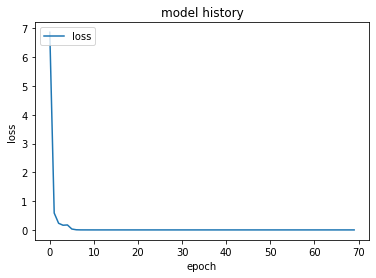

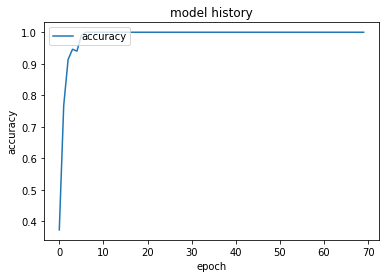

1.0
[[18  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0 13  0]
 [ 0  0  0  0  0 25]]
----------------------------
Epoch 1/70
834/834 [==============================] - 3s 4ms/step - loss: 0.1690 - accuracy: 0.9652
Epoch 2/70
834/834 [==============================] - 3s 4ms/step - loss: 0.0411 - accuracy: 0.9844
Epoch 3/70
834/834 [==============================] - 3s 4ms/step - loss: 0.0525 - accuracy: 0.9868
Epoch 4/70
834/834 [==============================] - 3s 4ms/step - loss: 0.0524 - accuracy: 0.9856
Epoch 5/70
834/834 [==============================] - 3s 4ms/step - loss: 0.3688 - accuracy: 0.9460
Epoch 6/70
834/834 [==============================] - 3s 4ms/step - loss: 0.0462 - accuracy: 0.9844
Epoch 7/70
834/834 [==============================] - 3s 4ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 8/70
834/834 [==============================] - 3s 4ms/step - loss: 8.1508e-05 - accuracy: 1.0000
Epoch 9/70
834/834 [================

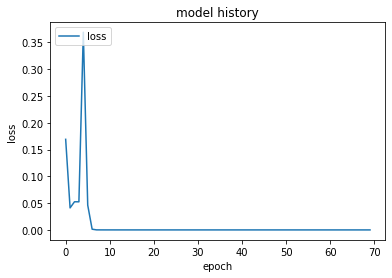

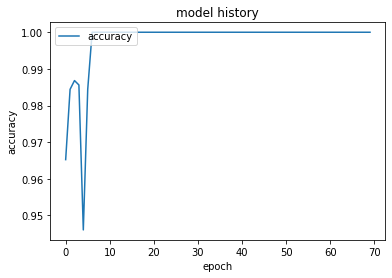

1.0
[[18  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0 13  0]
 [ 0  0  0  0  0 25]]
----------------------------
Epoch 1/70
834/834 [==============================] - 3s 4ms/step - loss: 0.1656 - accuracy: 0.9700
Epoch 2/70
834/834 [==============================] - 3s 4ms/step - loss: 0.0061 - accuracy: 0.9976
Epoch 3/70
834/834 [==============================] - 3s 4ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 4/70
834/834 [==============================] - 3s 4ms/step - loss: 3.6764e-04 - accuracy: 1.0000
Epoch 5/70
834/834 [==============================] - 3s 4ms/step - loss: 1.6346e-05 - accuracy: 1.0000
Epoch 6/70
834/834 [==============================] - 3s 4ms/step - loss: 5.0034e-06 - accuracy: 1.0000
Epoch 7/70
834/834 [==============================] - 3s 4ms/step - loss: 3.4459e-06 - accuracy: 1.0000
Epoch 8/70
834/834 [==============================] - 3s 4ms/step - loss: 2.7805e-06 - accuracy: 1.0000
Epoch 9/70
834/834 [

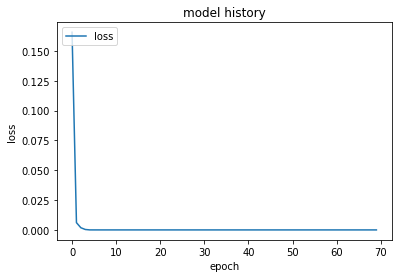

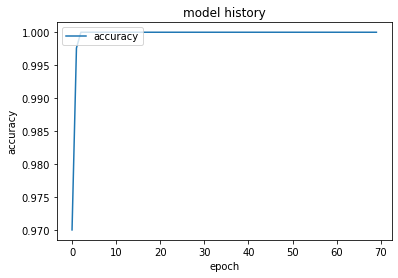

1.0
[[18  0  0  0  0  0]
 [ 0  7  0  0  0  0]
 [ 0  0  9  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0 13  0]
 [ 0  0  0  0  0 25]]
----------------------------
Epoch 1/70
834/834 [==============================] - 3s 4ms/step - loss: 0.0010 - accuracy: 0.9988
Epoch 2/70
834/834 [==============================] - 3s 4ms/step - loss: 0.1700 - accuracy: 0.9724
Epoch 3/70
834/834 [==============================] - 3s 4ms/step - loss: 0.0343 - accuracy: 0.9916
Epoch 4/70
834/834 [==============================] - 3s 4ms/step - loss: 0.0614 - accuracy: 0.9916
Epoch 5/70
834/834 [==============================] - 3s 4ms/step - loss: 2.1983e-04 - accuracy: 1.0000
Epoch 6/70
834/834 [==============================] - 3s 4ms/step - loss: 3.8676e-05 - accuracy: 1.0000
Epoch 7/70
834/834 [==============================] - 3s 4ms/step - loss: 1.4142e-05 - accuracy: 1.0000
Epoch 8/70
834/834 [==============================] - 3s 4ms/step - loss: 1.0293e-05 - accuracy: 1.0000
Epoch 9/70
834/834 [====

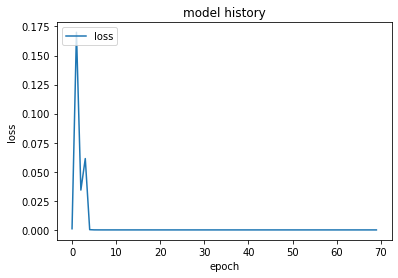

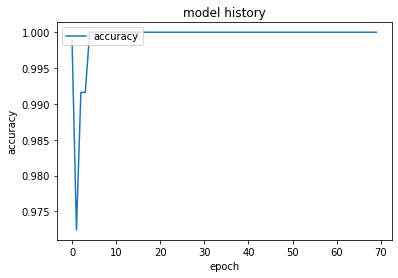

1.0
[[18  0  0  0  0  0]
 [ 0  7  0  0  0  0]
 [ 0  0  9  0  0  0]
 [ 0  0  0 20  0  0]
 [ 0  0  0  0 14  0]
 [ 0  0  0  0  0 25]]
----------------------------
Epoch 1/70
834/834 [==============================] - 3s 4ms/step - loss: 0.1400 - accuracy: 0.9796
Epoch 2/70
834/834 [==============================] - 3s 4ms/step - loss: 0.0670 - accuracy: 0.9880
Epoch 3/70
834/834 [==============================] - 3s 4ms/step - loss: 0.0848 - accuracy: 0.9868
Epoch 4/70
834/834 [==============================] - 3s 4ms/step - loss: 0.0370 - accuracy: 0.9916
Epoch 5/70
834/834 [==============================] - 3s 4ms/step - loss: 0.0138 - accuracy: 0.9976
Epoch 6/70
834/834 [==============================] - 3s 4ms/step - loss: 0.0057 - accuracy: 0.9976
Epoch 7/70
834/834 [==============================] - 3s 4ms/step - loss: 7.3887e-04 - accuracy: 1.0000
Epoch 8/70
834/834 [==============================] - 3s 4ms/step - loss: 4.0434e-05 - accuracy: 1.0000
Epoch 9/70
834/834 [============

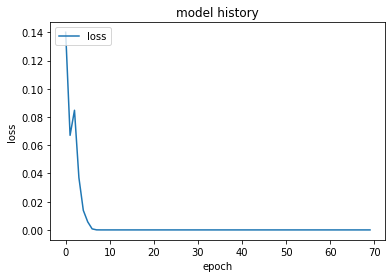

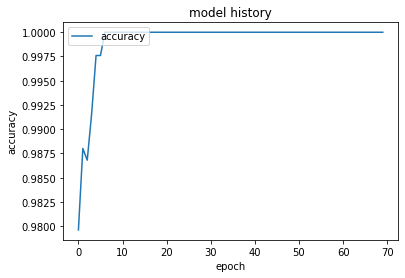

1.0
[[18  0  0  0  0  0]
 [ 0  7  0  0  0  0]
 [ 0  0  9  0  0  0]
 [ 0  0  0 20  0  0]
 [ 0  0  0  0 14  0]
 [ 0  0  0  0  0 25]]
----------------------------
Epoch 1/70
834/834 [==============================] - 3s 4ms/step - loss: 0.0397 - accuracy: 0.9868
Epoch 2/70
834/834 [==============================] - 3s 4ms/step - loss: 0.0821 - accuracy: 0.9772
Epoch 3/70
834/834 [==============================] - 3s 4ms/step - loss: 0.0372 - accuracy: 0.9892
Epoch 4/70
834/834 [==============================] - 3s 4ms/step - loss: 0.0106 - accuracy: 0.9964
Epoch 5/70
834/834 [==============================] - 3s 4ms/step - loss: 0.0038 - accuracy: 0.9976
Epoch 6/70
834/834 [==============================] - 3s 4ms/step - loss: 1.0449e-06 - accuracy: 1.0000
Epoch 7/70
834/834 [==============================] - 3s 4ms/step - loss: 1.0447e-06 - accuracy: 1.0000
Epoch 8/70
834/834 [==============================] - 3s 4ms/step - loss: 1.2386e-06 - accuracy: 1.0000
Epoch 9/70
834/834 [========

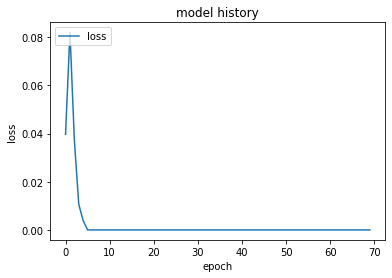

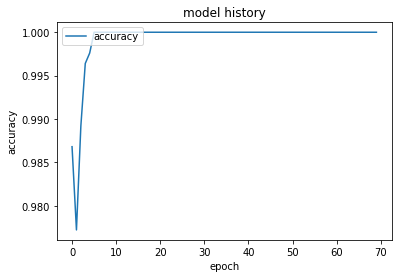

1.0
[[18  0  0  0  0  0]
 [ 0  7  0  0  0  0]
 [ 0  0  9  0  0  0]
 [ 0  0  0 20  0  0]
 [ 0  0  0  0 14  0]
 [ 0  0  0  0  0 25]]
----------------------------
Epoch 1/70
834/834 [==============================] - 3s 4ms/step - loss: 1.7867e-08 - accuracy: 1.0000
Epoch 2/70
834/834 [==============================] - 3s 4ms/step - loss: 2.0726e-08 - accuracy: 1.0000
Epoch 3/70
834/834 [==============================] - 3s 4ms/step - loss: 0.0381 - accuracy: 0.9916
Epoch 4/70
834/834 [==============================] - 3s 4ms/step - loss: 0.1262 - accuracy: 0.9856
Epoch 5/70
834/834 [==============================] - 3s 4ms/step - loss: 0.0650 - accuracy: 0.9856
Epoch 6/70
834/834 [==============================] - 3s 4ms/step - loss: 0.0737 - accuracy: 0.9832
Epoch 7/70
834/834 [==============================] - 3s 4ms/step - loss: 0.0045 - accuracy: 0.9976
Epoch 8/70
834/834 [==============================] - 3s 4ms/step - loss: 0.0027 - accuracy: 0.9988
Epoch 9/70
834/834 [============

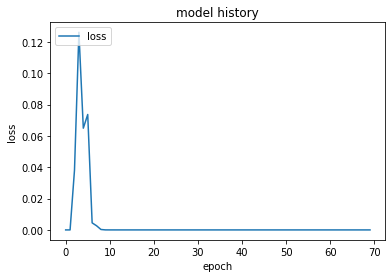

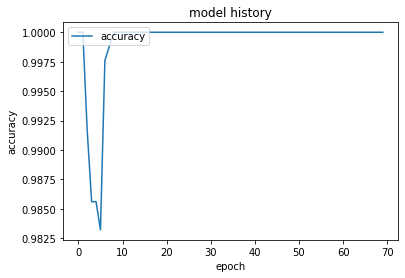

1.0
[[18  0  0  0  0  0]
 [ 0  7  0  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0 14  0]
 [ 0  0  0  0  0 25]]
----------------------------
Epoch 1/70
835/835 [==============================] - 4s 5ms/step - loss: 0.0298 - accuracy: 0.9928
Epoch 2/70
835/835 [==============================] - 3s 4ms/step - loss: 0.0150 - accuracy: 0.9916
Epoch 3/70
835/835 [==============================] - 3s 4ms/step - loss: 0.0014 - accuracy: 0.9988
Epoch 4/70
835/835 [==============================] - 3s 4ms/step - loss: 0.0431 - accuracy: 0.9916
Epoch 5/70
835/835 [==============================] - 3s 4ms/step - loss: 0.1298 - accuracy: 0.9772
Epoch 6/70
835/835 [==============================] - 3s 4ms/step - loss: 0.0568 - accuracy: 0.9892
Epoch 7/70
835/835 [==============================] - 3s 4ms/step - loss: 0.1304 - accuracy: 0.9808
Epoch 8/70
835/835 [==============================] - 3s 4ms/step - loss: 0.1324 - accuracy: 0.9832
Epoch 9/70
835/835 [====================

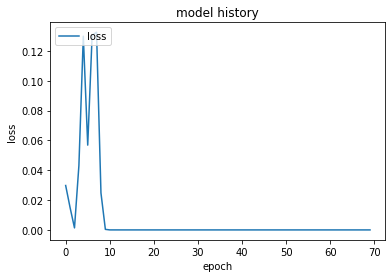

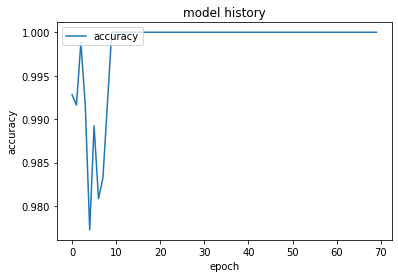

1.0
[[17  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0 14  0]
 [ 0  0  0  0  0 24]]
----------------------------
Epoch 1/70
835/835 [==============================] - 3s 4ms/step - loss: 0.0303 - accuracy: 0.9916
Epoch 2/70
835/835 [==============================] - 3s 4ms/step - loss: 0.0282 - accuracy: 0.9940
Epoch 3/70
835/835 [==============================] - 3s 4ms/step - loss: 0.0163 - accuracy: 0.9940
Epoch 4/70
835/835 [==============================] - 3s 4ms/step - loss: 0.0016 - accuracy: 0.9988
Epoch 5/70
835/835 [==============================] - 3s 4ms/step - loss: 0.0504 - accuracy: 0.9928
Epoch 6/70
835/835 [==============================] - 3s 4ms/step - loss: 0.0494 - accuracy: 0.9904
Epoch 7/70
835/835 [==============================] - 3s 4ms/step - loss: 1.3743e-05 - accuracy: 1.0000
Epoch 8/70
835/835 [==============================] - 3s 4ms/step - loss: 1.5837e-04 - accuracy: 1.0000
Epoch 9/70
835/835 [============

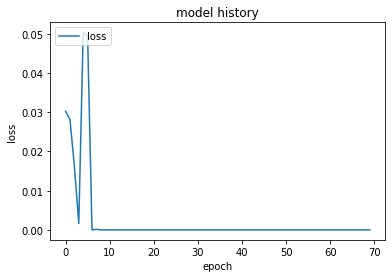

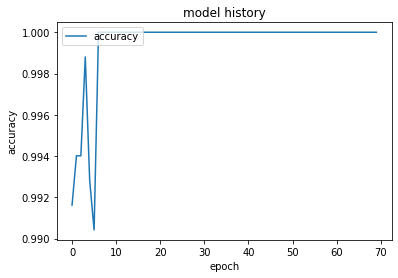

1.0
[[17  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0 13  0]
 [ 0  0  0  0  0 25]]
----------------------------
Epoch 1/70
835/835 [==============================] - 3s 4ms/step - loss: 4.1402e-09 - accuracy: 1.0000
Epoch 2/70
835/835 [==============================] - 3s 4ms/step - loss: 2.2842e-09 - accuracy: 1.0000
Epoch 3/70
835/835 [==============================] - 3s 4ms/step - loss: 1.4277e-09 - accuracy: 1.0000
Epoch 4/70
835/835 [==============================] - 3s 4ms/step - loss: 1.2849e-09 - accuracy: 1.0000
Epoch 5/70
835/835 [==============================] - 3s 4ms/step - loss: 1.1421e-09 - accuracy: 1.0000
Epoch 6/70
835/835 [==============================] - 3s 4ms/step - loss: 5.7106e-10 - accuracy: 1.0000
Epoch 7/70
835/835 [==============================] - 3s 4ms/step - loss: 4.2830e-10 - accuracy: 1.0000
Epoch 8/70
835/835 [==============================] - 3s 4ms/step - loss: 2.8553e-10 - accuracy: 1.0000
Epoch 9/

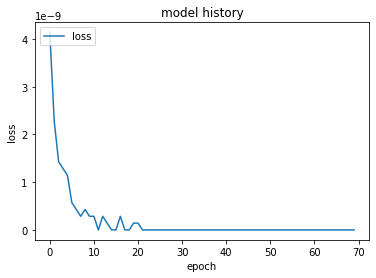

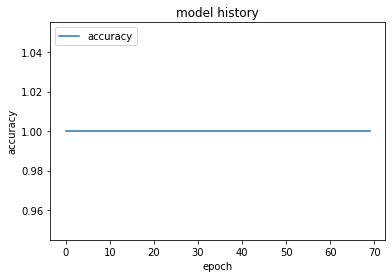

1.0
[[17  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0 13  0]
 [ 0  0  0  0  0 25]]
----------------------------


In [11]:
prediction=[]
confusion_list=[]
IMAGE_WIDTH=224
IMAGE_HEIGHT=224
num_classes = 6
for train_index, test_index in skf.split(img_data, labels):
#     print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = img_data[train_index], img_data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    x_train=x_train.reshape(x_train.shape[0],IMAGE_WIDTH,IMAGE_HEIGHT,3)
    x_test=x_test.reshape(x_test.shape[0],IMAGE_WIDTH,IMAGE_HEIGHT,3)
    y_train =to_categorical(y_train, num_classes)
    y_test =to_categorical(y_test, num_classes)
    X,Y=cnn_model(x_train,x_test,y_test,y_train)
    prediction.append(X)
    confusion_list.append(Y)
    print(X)
    print(Y)
    print("----------------------------")

In [12]:
print(prediction)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [13]:
for x in range(len(confusion_list)): 
    print (confusion_list[x],sep = "\n")
    print("----------------------------")    

[[18  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0 13  0]
 [ 0  0  0  0  0 25]]
----------------------------
[[18  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0 13  0]
 [ 0  0  0  0  0 25]]
----------------------------
[[18  0  0  0  0  0]
 [ 0  7  0  0  0  0]
 [ 0  0  9  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0 13  0]
 [ 0  0  0  0  0 25]]
----------------------------
[[18  0  0  0  0  0]
 [ 0  7  0  0  0  0]
 [ 0  0  9  0  0  0]
 [ 0  0  0 20  0  0]
 [ 0  0  0  0 14  0]
 [ 0  0  0  0  0 25]]
----------------------------
[[18  0  0  0  0  0]
 [ 0  7  0  0  0  0]
 [ 0  0  9  0  0  0]
 [ 0  0  0 20  0  0]
 [ 0  0  0  0 14  0]
 [ 0  0  0  0  0 25]]
----------------------------
[[18  0  0  0  0  0]
 [ 0  7  0  0  0  0]
 [ 0  0  9  0  0  0]
 [ 0  0  0 20  0  0]
 [ 0  0  0  0 14  0]
 [ 0  0  0  0  0 25]]
----------------------------
[[18  0  0  0  0  0]
 [ 0  7  0  0  0  0]
 [ 0  0  8  0  0  0]
 